# IE343 -- Statistical Machine Learning and Its Applications
## Lab 8: Support Vector Machines
- [1. Support Vector Classifier](#1.-Support-Vector-Classifier)
- [2. Support Vector Machine](#2.-Support-Vector-Machine)
- [3. ROC Curves](#3.-ROC-Curves)
- [4. SVM with Multiple Classes](#4.-SVM-with-Multiple-Classes)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc

%matplotlib inline
plt.style.use('seaborn-white')

## 1. Support Vector Classifier

Define a function to plot a classifier with support vectors.

<div>
<img src="figures/SVM_1.png" width="500"/>
</div>

<div>
<img src="figures/SVM_2.png" width="500"/>
</div>

<div>
<img src="figures/SVM_3.png" width="500"/>
</div>

In [7]:
def plot_svc(title, svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title, color='k')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

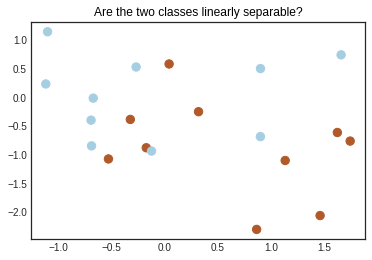

In [8]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(1)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
plt.title('Are the two classes linearly separable?', color='k')
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)

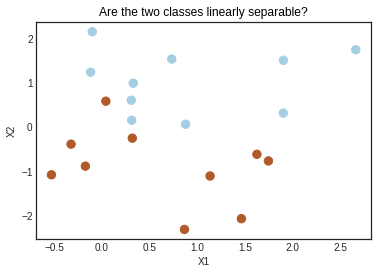

In [9]:
X[y == -1] = X[y == -1] +1
plt.title('Are the two classes linearly separable?', color='k')
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

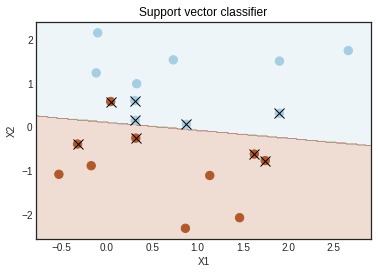

Number of support vectors:  9


In [10]:
# Support Vector Classifier with linear kernel.
svc = SVC(C= 1.0, kernel='linear')
svc.fit(X, y)
plot_svc("Support vector classifier", svc, X, y)

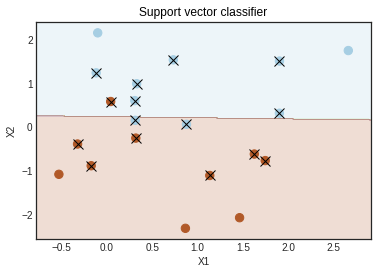

Number of support vectors:  15


In [11]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc("Support vector classifier", svc2, X, y)

In [12]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00092809, 0.00056074, 0.00057621, 0.00053272, 0.00053284,
        0.0005229 , 0.00055323]),
 'std_fit_time': array([3.39084500e-04, 4.18407217e-05, 1.45961046e-04, 7.82303640e-06,
        1.08852900e-05, 5.80665500e-06, 1.14848484e-05]),
 'mean_score_time': array([0.00045013, 0.00029247, 0.00029109, 0.00028768, 0.00028186,
        0.00028081, 0.00028923]),
 'std_score_time': array([1.54030581e-04, 2.18147267e-05, 3.14828913e-05, 1.04302066e-05,
        3.62647120e-06, 3.26868307e-06, 8.63157579e-06]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split2_test_score': array([1., 1., 1., 1., 1., 1., 1

In [13]:
# 0.001 is best according to GridSearchCV. 
clf.best_params_

{'C': 0.001}

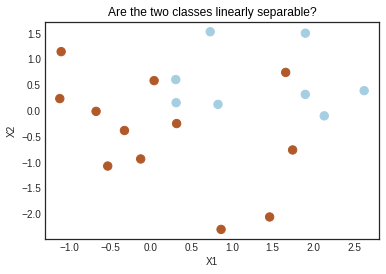

In [14]:
# Generating test data
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == -1] = X_test[y_test == -1] +1
plt.title('Are the two classes linearly separable?', color='k')
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [15]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

,-1,1
-1,5,3
1,3,9


In [16]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,8,0
1,4,8


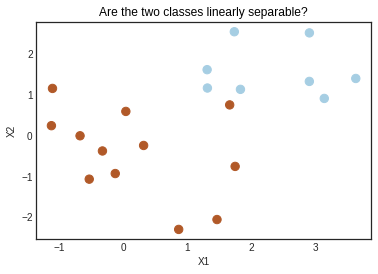

In [17]:
# Changing the test data so that the classes are really seperable with a hyperplane.
X_test[y_test == -1] = X_test[y_test == -1] +1
plt.title('Are the two classes linearly separable?', color='k')
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [18]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

SVC(C=10.0, kernel='linear')

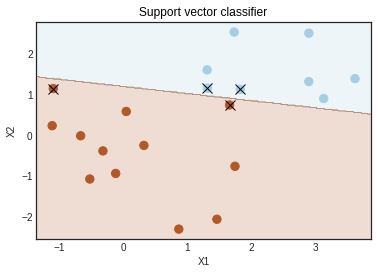

Number of support vectors:  4


In [19]:
plot_svc("Support vector classifier", svc4, X_test, y_test)

In [20]:
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, kernel='linear')

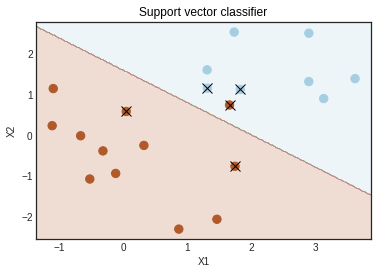

Number of support vectors:  5


In [21]:
plot_svc("Support vector classifier", svc5, X_test, y_test)

## 2. Support Vector Machine 

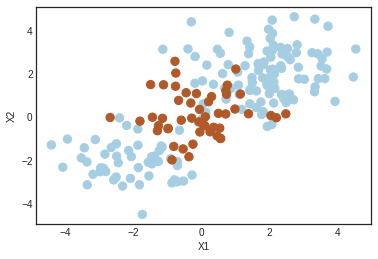

In [22]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [23]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(gamma=1)

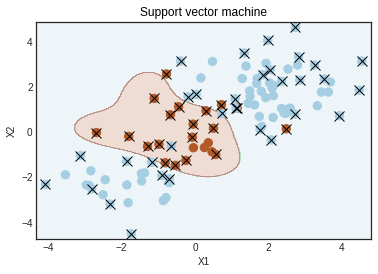

Number of support vectors:  51


In [24]:
plot_svc("Support vector machine", svm, X_train, y_train)

In [25]:
# Increasing C parameter, allowing more flexibility --> Smaller margin
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, gamma=1.0)

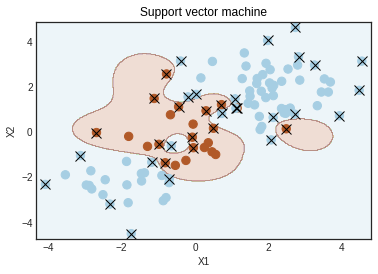

Number of support vectors:  36


In [26]:
plot_svc("Support vector machine", svm2, X_train, y_train)

In [27]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00153282, 0.00165694, 0.00184188, 0.00228071, 0.00109408,
        0.00090437, 0.00100996, 0.00141106, 0.0016715 , 0.00191395,
        0.00193605, 0.00143137, 0.00222175, 0.00207129, 0.0021765 ,
        0.00146499, 0.0019352 , 0.00262251, 0.00284581, 0.00317948,
        0.0021045 , 0.00201082, 0.00228179, 0.00326476, 0.00285006]),
 'std_fit_time': array([8.72095569e-04, 7.64247384e-04, 4.97886730e-04, 5.74382591e-04,
        6.04149527e-05, 1.77844279e-05, 2.91564477e-05, 5.60994997e-04,
        3.60528229e-04, 6.11007216e-04, 7.50762481e-04, 3.57401764e-04,
        7.65033464e-04, 6.84532735e-04, 5.22156289e-04, 6.12901545e-04,
        7.71412358e-04, 7.78500664e-04, 8.38426938e-04, 8.26352391e-04,
        6.95379333e-04, 7.58217324e-04, 8.46311494e-04, 7.47103403e-04,
        7.99173024e-04]),
 'mean_score_time': array([0.00071163, 0.00079629, 0.00100577, 0.00106575, 0.00049472,
        0.00050817, 0.00050061, 0.00061817, 0.00076437, 0.00075104,
        0.00

In [28]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [29]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[66,  7],
       [ 6, 21]])

In [30]:
clf.best_estimator_.score(X_test, y_test)

0.87

## 3. ROC Curves

Comparing the ROC curves of two models on train/test data. One model is more flexible than the other.

<div>
<img src="figures/radial.png" width="500"/>
</div>

In [34]:
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [35]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

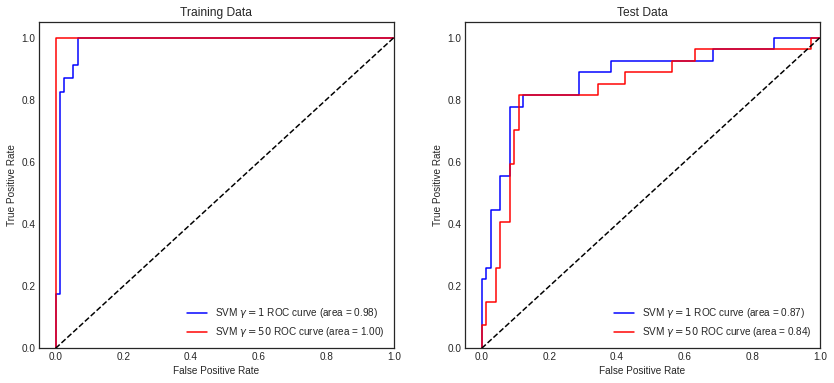

In [36]:
# ROC curve for training data
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

# ROC curve for test data
y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

As expected, the more flexible model scores better on training data but worse on the test data.

## 4. SVM with Multiple Classes

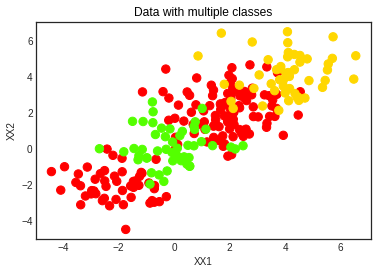

In [37]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.title('Data with multiple classes', color='k')
plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [38]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1)

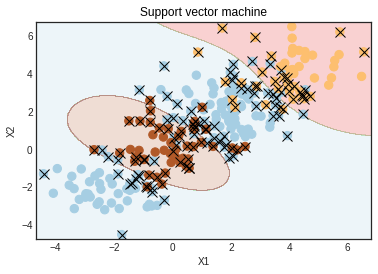

Number of support vectors:  128


In [39]:
plot_svc("Support vector machine", svm5, XX, yy)